# Convergence Metrics

- (1) Import and loading the model 
- (2) Convergence Metrics Overijssel
- (3) Convergence Metrics Gelderland

### (1) Import and loading the model

In [1]:
# Import general python packages
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt

import seaborn as sns

# Import functions
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation
from problem_formulation import sum_over,time_step_0,time_step_1

# Loading in the necessary modules for EMA workbench and functions
from ema_workbench import (Model, Scenario, Constraint, ScalarOutcome)
from ema_workbench.util import ema_logging
from ema_workbench.em_framework.optimization import ArchiveLogger, EpsilonProgress
from ema_workbench import save_results, load_results
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis import parcoords

In [2]:

def initialize_model():
    ema_logging.log_to_stderr(ema_logging.INFO)
    print("Initializing model...")
    dike_model, planning_steps = get_model_for_problem_formulation(7)
    print("Model initialized.")
    return dike_model, planning_steps

# Writing a function to create actor specific problem formulations
def problem_formulation_actor(problem_formulation_actor, uncertainties, levers):
    # Load the model:
    function = DikeNetwork()
    # workbench model:
    model = Model('dikesnet', function=function)
    # Outcomes are all costs, thus they have to minimized:
    direction = ScalarOutcome.MINIMIZE

    model.uncertainties = uncertainties
    model.levers = levers

    cost_variables = []
    cost_variables.extend(
    [
        f"{dike}_{e}"
        for e in ["Expected Annual Damage", "Dike Investment Costs"]
        for dike in function.dikelist
    ])
    cost_variables.extend([f"RfR Total Costs"])
    cost_variables.extend([f"Expected Evacuation Costs"])

    if problem_formulation_actor == 6:  # GELDERLAND
        model.outcomes.clear()
        model.outcomes = [
            ScalarOutcome(f'Total_period_Costs_0',
                          variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
                          function=time_step_0, kind=direction),
            ScalarOutcome(f'Total_period_Costs_1',
                          variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
                          function=time_step_1, kind=direction),
            # ScalarOutcome(f'Total_period_Costs_2',
            #               variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
            #               function=time_step_2, kind=direction),
            # ScalarOutcome(f'Total_period_Costs_3',
            #               variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
            #               function=time_step_3, kind=direction),
            # ScalarOutcome(f'Total_period_Costs_4',
            #               variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
            #               function=time_step_4, kind=direction),
            ScalarOutcome('Expected Annual Damage A1_', variable_name='A.1_Expected Annual Damage', function=sum_over,
                          kind=direction),
            ScalarOutcome('Expected Annual Damage A2_', variable_name='A.2_Expected Annual Damage', function=sum_over,
                          kind=direction),
            ScalarOutcome('Expected Annual Damage A3_', variable_name='A.3_Expected Annual Damage', function=sum_over,
                          kind=direction),
            ScalarOutcome('Total Costs', variable_name=cost_variables, function=sum_over, kind=direction),
            ScalarOutcome("Expected Number of Deaths_", variable_name=
            [f"{dike}_Expected Number of Deaths" for dike in function.dikelist], function=sum_over, kind=direction)]


    elif problem_formulation_actor == 7:  # OVERIJSSEL
        model.outcomes.clear()
        model.outcomes = [
            ScalarOutcome(f'Total_period_Costs_0',
                          variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
                          function=time_step_0, kind=direction),
            ScalarOutcome(f'Total_period_Costs_1',
                          variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
                          function=time_step_1, kind=direction),
            # ScalarOutcome(f'Total_period_Costs_2',
            #               variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
            #               function=time_step_2, kind=direction),
            # # ScalarOutcome(f'Total_period_Costs_3',
            #               variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
            #               function=time_step_3, kind=direction),
            # # ScalarOutcome(f'Total_period_Costs_4',
            #               variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
            #               function=time_step_4, kind=direction),
            ScalarOutcome('Expected Annual Damage A4_', variable_name='A.4_Expected Annual Damage', function=sum_over,
                          kind=direction),
            ScalarOutcome('Expected Annual Damage A5_', variable_name='A.5_Expected Annual Damage', function=sum_over,
                          kind=direction),
            ScalarOutcome('Total Costs', variable_name=cost_variables, function=sum_over, kind=direction),
            ScalarOutcome("Expected Number of Deaths_", variable_name=
            [f"{dike}_Expected Number of Deaths" for dike in function.dikelist], function=sum_over, kind=direction)]

    else:
        raise TypeError('unknown identifier')
    return model

### Overijssel
if __name__ == '__main__':
    dike_model, planning_steps = initialize_model()

    uncertainties = dike_model.uncertainties
    levers = dike_model.levers
    
    model = problem_formulation_actor(6, uncertainties, levers)

    # Deepcopying the uncertainties and levers
    uncertainties = copy.deepcopy(dike_model.uncertainties)
    levers = copy.deepcopy(dike_model.levers)

    # Running the optimization for Overijssel
    function = DikeNetwork()

Initializing model...
Model initialized.


### (1) Convergence Metrics Overijssel

In [3]:
convergencee = pd.read_csv('Overijssel MORDM_epsilon.csv')

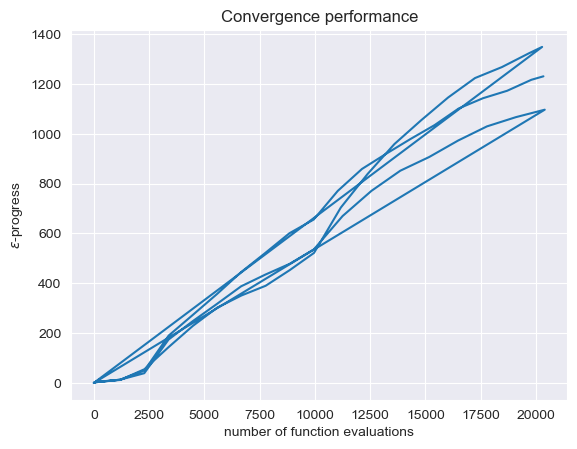

In [4]:
plt.plot(convergencee.nfe, convergencee.epsilon_progress)

plt.ylabel('$\epsilon$-progress')
plt.xlabel('number of function evaluations')
plt.title('Convergence performance')
plt.show()
#plt.savefig('./figures/Convergence Performance Gelderland.png')

In [9]:
metrics_by_seed = pd.read_csv('./Outcomes/metrics_seed_0_archive_0.csv')
metrics_by_seed

,generational_distance,hypervolume,epsilon_indicator,inverted_gd,spacing,nfe
0,inf,0.000000,inf,inf,0.000000,0
1,4.455145,0.000000,4.650618,4.856401,0.000000,100
2,1.399410,0.000000,1.979969,1.803813,0.000000,1195
3,0.782674,0.000000,1.205914,1.344946,0.000000,2286
4,0.207209,0.034293,0.808127,0.459382,923.164687,3382
5,0.176946,0.054582,0.798006,0.407526,1032.124372,4480
6,0.140895,0.065964,0.787910,0.383795,1331.599661,5576
7,0.126493,0.072834,0.784768,0.360552,1368.354359,6671
8,0.133686,0.080011,0.754744,0.337281,953.080739,7766
9,0.122946,0.084054,0.748361,0.328197,1110.362888,8863


TypeError: string indices must be integers, not 'str'

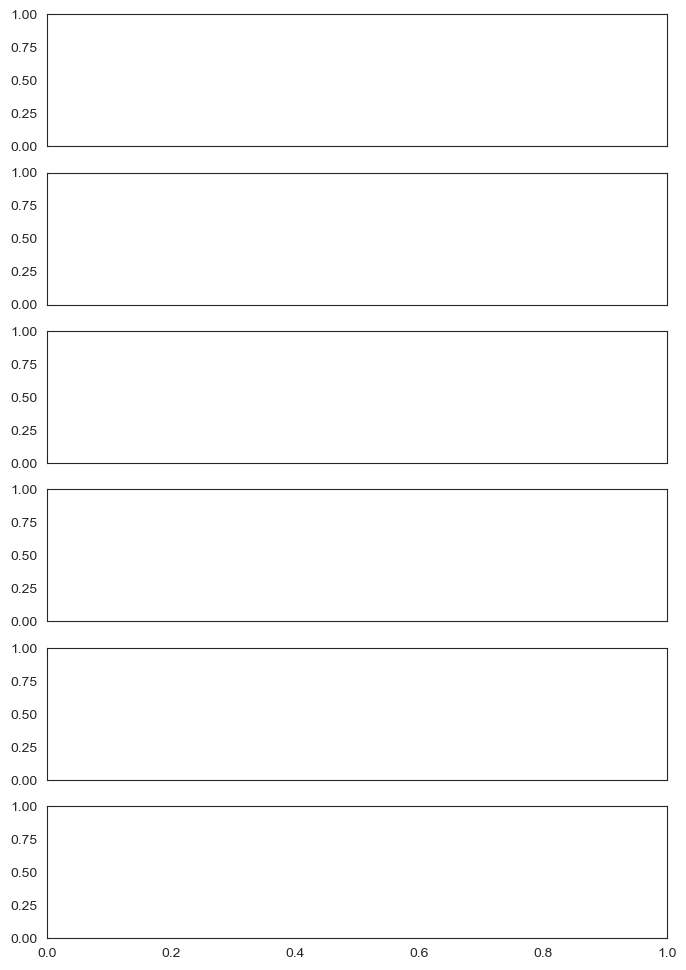

In [15]:
sns.set_style("white")
fig, axes = plt.subplots(nrows=6, figsize=(8, 12), sharex=True)

ax1, ax2, ax3, ax4, ax5, ax6 = axes
convergences = pd.read_csv('./Outcomes/Overijssel Multi MORDM_Epsilon.csv')
for metrics, convergence in zip(metrics_by_seed, convergences):
    #print(metrics.nfe)
    ax1.plot(metrics['nfe'], metrics.hypervolume)
    ax1.set_ylabel("hypervolume")

#     ax2.plot(convergence.nfe, convergence.epsilon_progress)
#     ax2.set_ylabel("$\epsilon$ progress")
# 
#     ax3.plot(metrics.nfe, metrics.generational_distance)
#     ax3.set_ylabel("generational distance")
# 
#     ax4.plot(metrics.nfe, metrics.epsilon_indicator)
#     ax4.set_ylabel("epsilon indicator")
# 
#     ax5.plot(metrics.nfe, metrics.inverted_gd)
#     ax5.set_ylabel("inverted generational\ndistance")
# 
#     ax6.plot(metrics.nfe, metrics.spacing)
#     ax6.set_ylabel("spacing")
# 
# ax6.set_xlabel("nfe")


# sns.despine(fig)

# plt.show()

### (2) Convergence Metrics Gelderland

In [3]:
convergencee = pd.read_csv('Gelderland_Multi_MORDM_epsilon.csv')

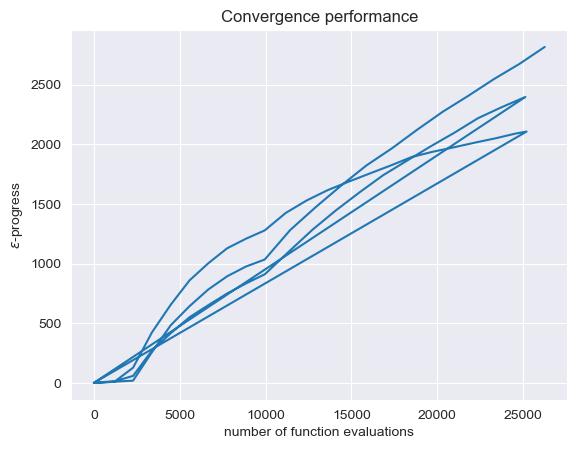

<Figure size 640x480 with 0 Axes>

In [4]:
plt.plot(convergencee.nfe, convergencee.epsilon_progress)

plt.ylabel('$\epsilon$-progress')
plt.xlabel('number of function evaluations')
plt.title('Convergence performance')
plt.show()
#plt.savefig('./figures/Convergence Performance Gelderland.png')

In [11]:
all_archives = []

for i in range(2):
    archives = ArchiveLogger.load_archives(f"./archives/{i}.tar.gz")
    all_archives.append(archives)

In [22]:
from ema_workbench import (
    HypervolumeMetric,
    GenerationalDistanceMetric,
    EpsilonIndicatorMetric,
    InvertedGenerationalDistanceMetric,
    SpacingMetric
)
from ema_workbench.em_framework.optimization import to_problem
from ema_workbench.em_framework.optimization import epsilon_nondominated

problem = to_problem(model, searchover="levers")
outcomes = pd.read_csv('Gelderland_Multi_MORDM_outcomes.csv')
results = list(outcomes.loc[:, [o.name for o in model.outcomes]])
reference_set = epsilon_nondominated(results, [1] * len(model.outcomes), problem)

hv = HypervolumeMetric(reference_set, problem)
gd = GenerationalDistanceMetric(reference_set, problem, d=1)
ei = EpsilonIndicatorMetric(reference_set, problem)
ig = InvertedGenerationalDistanceMetric(reference_set, problem, d=1)
sm = SpacingMetric(problem)


metrics_by_seed = []
for archives in all_archives:
    metrics = []
    for nfe, archive in archives.items():
        scores = {
            "generational_distance": gd.calculate(archive),
            "hypervolume": hv.calculate(archive),
            "epsilon_indicator": ei.calculate(archive),
            "inverted_gd": ig.calculate(archive),
            "spacing": sm.calculate(archive),
            "nfe": int(nfe),
        }
        metrics.append(scores)
    metrics = pd.DataFrame.from_dict(metrics)

    # sort metrics by number of function evaluations
    metrics.sort_values(by="nfe", inplace=True)
    metrics_by_seed.append(metrics)

TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid